Q2: How does pay for a certain job title vary from year to year? Does the average pay for a certain job title vary noticeably across boroughs?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('payroll.csv')
df = df[~df['Agency Start Date'].str[-4:].eq('9999')]
df.head(5)

C:\Users\ebrah\AppData\Local\Temp\ipykernel_4560\133235073.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('payroll.csv')


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [4]:
# calculate hourly pay for each object, group them by job title, and calculate mean pay by title
df['Calculated Hourly Rate'] = df['Regular Gross Paid'] / df['Regular Hours'].apply(lambda x: np.inf if x <= 0 else x)
titles = df.groupby(['Title Description'])['Calculated Hourly Rate'].mean()

# let's pick a subset of jobs diversified across sectors, i.e. IT, healthcare, administration, education, public safety, leadership
# construction, legal, science, and public services
joi = [
    'CERTIFIED APPLICATIONS DEVELOPER',
    'PHYSICAL THERAPIST',
    'ADMINISTRATIVE ASSISTANT',
    'ASSISTANT PROFESSOR',
    'POLICE OFFICER',
    'EXECUTIVE DIRECTOR',
    'CONSTRUCTION PROJECT MANAGER',
    'ATTORNEY AT LAW',
    'RESEARCH SCIENTIST',
    '*SCHOOL LUNCH HELPER'
]

pay_by_title = titles.loc[joi]
pay_by_title

Title Description
CERTIFIED APPLICATIONS DEVELOPER     54.225710
PHYSICAL THERAPIST                   46.814248
ADMINISTRATIVE ASSISTANT             26.654464
ASSISTANT PROFESSOR                 243.151009
POLICE OFFICER                       33.502342
EXECUTIVE DIRECTOR                   99.229449
CONSTRUCTION PROJECT MANAGER         43.093192
ATTORNEY AT LAW                      49.546127
RESEARCH SCIENTIST                   58.551501
*SCHOOL LUNCH HELPER                 12.582653
Name: Calculated Hourly Rate, dtype: float64

Text(0.5, 1.0, 'Average Hourly Pay Rate by Job Title Through Time')

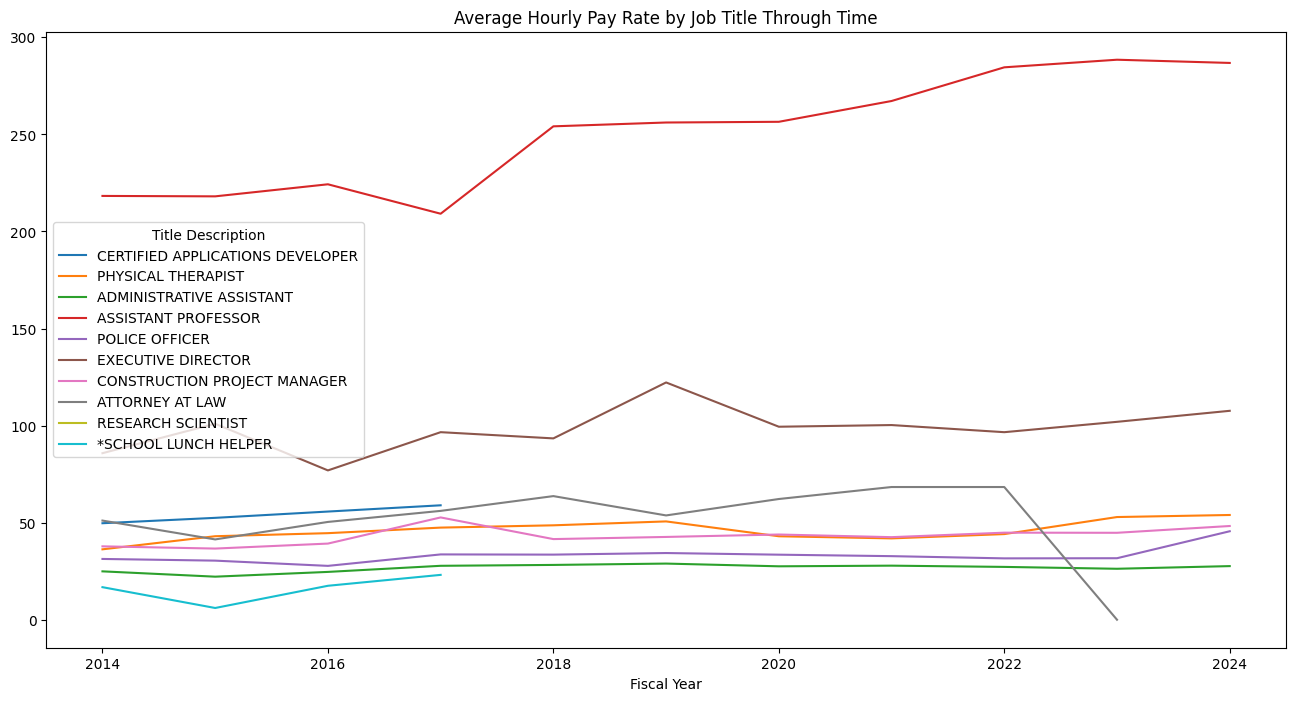

In [5]:
pay_by_title_year = df.groupby(['Title Description', 'Fiscal Year'])['Calculated Hourly Rate'].mean()
pay_by_title_year.loc[joi].unstack(level=0).plot(kind='line', figsize=(16, 8))
plt.title('Average Hourly Pay Rate by Job Title Through Time')

In [6]:
pd.set_option('display.max_rows', None)
pay_by_title_year.loc[joi]

Title Description                 Fiscal Year
CERTIFIED APPLICATIONS DEVELOPER  2014            49.707965
                                  2015            52.483238
                                  2016            55.723329
                                  2017            58.943811
                                  2019            54.025232
PHYSICAL THERAPIST                2014            36.263567
                                  2015            43.014888
                                  2016            44.590674
                                  2017            47.453617
                                  2018            48.632952
                                  2019            50.643233
                                  2020            42.996292
                                  2021            41.899740
                                  2022            44.113412
                                  2023            52.895658
                                  2024            53.9

## What is the general trend rate of salary increase in the selected group?

As we can see from the previous graph, and the figures below that, each job for the most part had a general uptick in hourly pay throughout the years. For example, "Attorney at Law" had a salary increase CAGR of (68.36 / 51.07)**(1/8) = 1.037, which is an approximately 3.7% compounding annual growth rate (adjusted for compounding salary using the geometric mean). This is roughly inline with expected annual inflation rates in the US, which is always estimated to be somewhere between 2.5 and 3.5%. For "Construction Project Manager", we have 2.47%. On the lower end, we have "Certifed Applications Developer", clocking in at approximately 1.68% per annum. "Certified School Lunch Helper" had a noticeably higher rate at around 11%, but with a substantially lower pay rate than every other profession in the selected group.

Text(0, 0.5, 'Pay Rate')

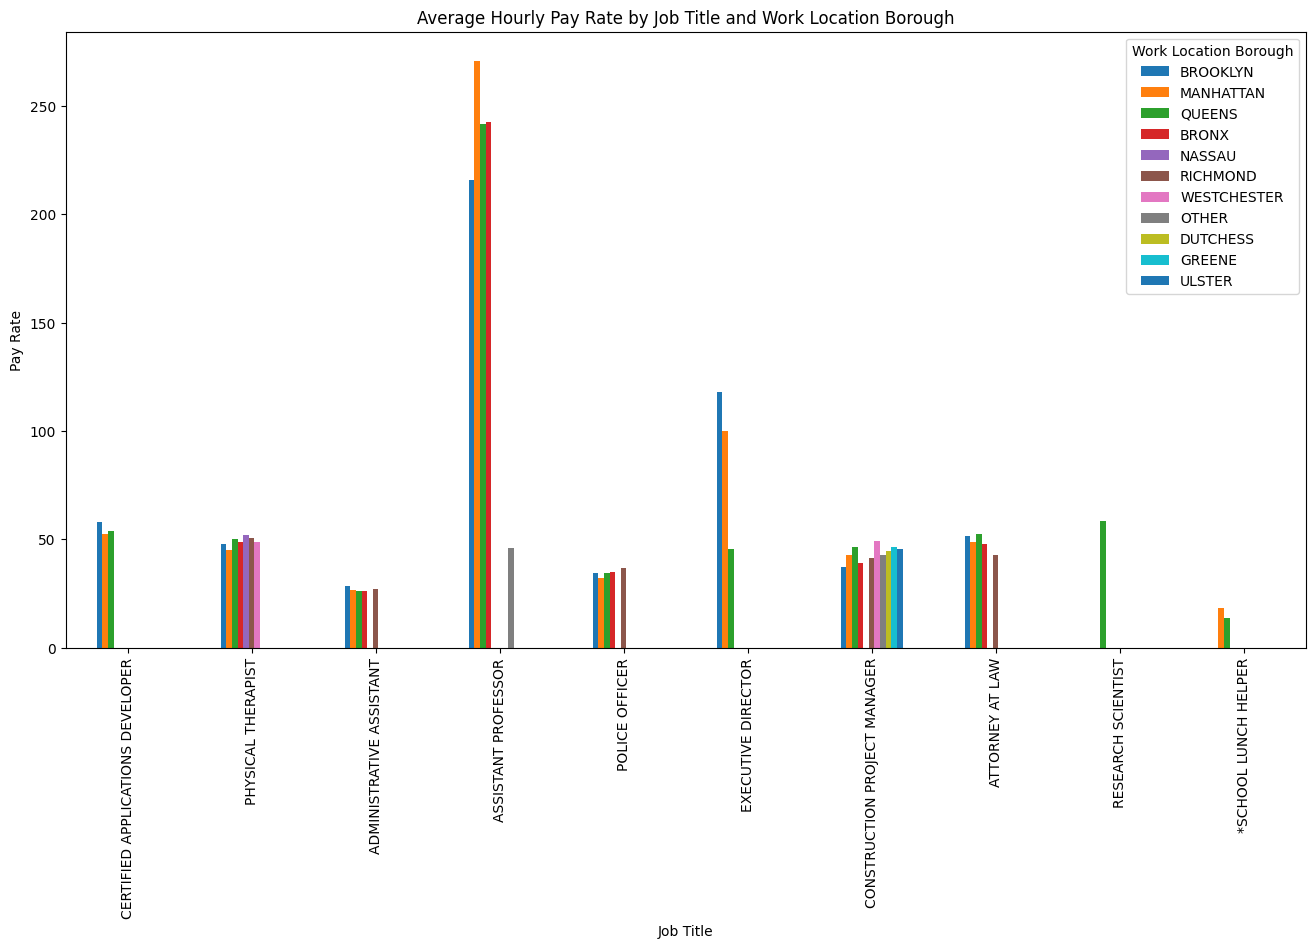

In [7]:
pay_by_title_borough = df.groupby(['Title Description', 'Work Location Borough'])['Calculated Hourly Rate'].mean()
pay_by_title_borough.loc[joi].unstack(level=1).plot(kind='bar', figsize=(16, 8))
plt.title('Average Hourly Pay Rate by Job Title and Work Location Borough')
plt.xlabel('Job Title')
plt.ylabel('Pay Rate')

We can also see from the above figure, that while average pay rates do differ across the different government jobs in each sector, there also seemed to be some noticeable difference in pay across boroughs, some more than other in different professions.

## A quick overview of one of the jobs ...

In [8]:
cm = df[df['Title Description'] == 'CONSTRUCTION PROJECT MANAGER']
print(f'sample size = {cm.shape[0]}')
cm.count()

sample size = 7092


Fiscal Year                   7092
Payroll Number                5078
Agency Name                   7092
Last Name                     7092
First Name                    7092
Mid Init                      3851
Agency Start Date             7092
Work Location Borough         6471
Title Description             7092
Leave Status as of June 30    7092
Base Salary                   7092
Pay Basis                     7092
Regular Hours                 7092
Regular Gross Paid            7092
OT Hours                      7092
Total OT Paid                 7092
Total Other Pay               7092
Calculated Hourly Rate        7092
dtype: int64

With a fairly large sample size of 7092 data objects and time coverage from 2014 to 2024, we might be onto something ripe for knowledge mining ...

## Application: Can we level the playing field a little when it comes to salary negotations?

I think the answer is: yes. We have good time coverage over a robust sample size that spans multiple government agencies. A common problem for both a prospective employer and a hopeful candidate, is how to negotiate? Often times, budgets are limited, and an honest employer neither wants to sell a good candidate short and repel them from the department, nor extravagantly break the bank without extenuating circumstances or demand. Conversely, while candidates must be realistic about their pay expectations, they don't really want to sell themselves short either.

Let's take a note out of Warren Buffet's playbook: base expectations. If we're to assume that an employer at the very least wants a middle-of-the road employee (nobody really wants below mediocre), then we can assume that middle level skills should be a floor to any negotation dialog. In a sense we're trying to establish a base market rate from which to discuss a convergence on pay. Since location (which influences cost of living) and seniority (experience and its related professional growth) seem to be highly influential factors in how much the starting pay is for a job applicant, it now seems like we have the basic outline for an unsupervised classification algorithm.

If we're to focus on Construction Project Managers, their seniority, and work location, then we can assemble the data from the NYC payroll in the form of 2-vectors, find an optimal set of k "pay-grades" or clusters, and a hopeful job applicant can plug his/her statistics into the model to predict his/her distance to the closest centroid using a basic Euclidean distance. Now our job-seeker can go into an interview confident when to stop negotations (when an offer goes below this centroid vector).

In [9]:
start = df['Agency Start Date'].dropna()
start = pd.to_datetime(start, format='%m/%d/%Y', errors='coerce').to_frame()
today = df['Fiscal Year'].dropna().apply(lambda x: f"1/1/{x}")
today = pd.to_datetime(today, format='%m/%d/%Y', errors='coerce').to_frame()

date_pairs = today.join(start)
df['Employment Duration'] = date_pairs.apply(lambda x: x['Fiscal Year'] - x['Agency Start Date'], axis=1)

In [13]:
df['Calculated Hourly Rate'] = df['Regular Gross Paid'] / df['Regular Hours'].apply(lambda x: np.inf if x <= 0 else x)
duration_by_job = df.loc[df['Title Description'] == 'CONSTRUCTION PROJECT MANAGER', ['Employment Duration', 'Work Location Borough', 'Calculated Hourly Rate']].dropna()
duration_by_job['Employment Duration'] = duration_by_job['Employment Duration'].dt.days / 365
duration_by_job.head(10)

,Employment Duration,Work Location Borough,Calculated Hourly Rate
16787,1.386301,MANHATTAN,60.799813
25403,1.347945,MANHATTAN,60.713115
75858,20.726027,QUEENS,42.336005
82132,0.082192,QUEENS,41.515852
84579,3.802740,MANHATTAN,61.296934
84647,22.504110,MANHATTAN,58.030896
84768,22.504110,MANHATTAN,48.243940
85700,3.783562,MANHATTAN,50.820703
85794,13.852055,MANHATTAN,51.742533
85946,14.216438,MANHATTAN,46.659220


In [50]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
borough = enc.fit_transform(duration_by_job[['Work Location Borough']])
print(enc.categories_)

# Remove all outlier rates
duration_by_job = duration_by_job[(duration_by_job['Calculated Hourly Rate'] <= 100) & (duration_by_job['Calculated Hourly Rate'] >= 5)]

duration_by_job['Employment Duration'] = duration_by_job['Employment Duration'].dropna()
duration_by_job['Calculated Hourly Rate'] = duration_by_job['Calculated Hourly Rate'].dropna()

x = np.hstack([borough, duration_by_job[['Employment Duration']].values, duration_by_job[['Calculated Hourly Rate']].values])

kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(x)

avg = np.zeros((12,))

for c in kmeans.cluster_centers_:
    avg += c

avg *= (1 / len(kmeans.cluster_centers_))
print(avg[11])

[array(['BRONX', 'BROOKLYN', 'DUTCHESS', 'GREENE', 'MANHATTAN', 'OTHER',
       'QUEENS', 'RICHMOND', 'ULSTER', 'WESTCHESTER'], dtype=object)]
46.433077776847725


In [51]:
# a person working in manhanttan with 26 years of experience paid 73 an hour
y = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 26, 73]]

centroid, = kmeans.predict(y)
print(centroid)

# a person working in manhanttan with 12 years of experience paid 48 an hour
y = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 12, 48]]

centroid, = kmeans.predict(y)
print(centroid)

# a person working in the bronx with 13 years of experience paid 40 an hour
y = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 40]]

centroid, = kmeans.predict(y)
print(centroid)

# a person working in the westchester with 12 years of experience paid 28 an hour
y = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 12, 58]]

centroid, = kmeans.predict(y)
print(centroid)
# kmeans.cluster_centers_[centroid][11]

3
0
1
0


According to the data above, all the sample data above have been clustered towards group 0, 1, or 3. However, what's a little more interesting is imputing missing data to find using an averaging strategy to find out what the salary would most likely be given a random drawing from someone with certain characteristics (except for the missing salary data, that is). So let's try to see what salary we should use as a cutoff value if we want to work in Manhattan with 7 years of experience or the Bronx with 14 years of experience:

In [57]:
# let's say I'm applying for a job in manhattan, and have 7 years of experience in the industry
y = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 7, avg[11]]]

centroid, = kmeans.predict(y)
print(f'base salary rate = {kmeans.cluster_centers_[centroid][11]}')

# 14 years of experience in the Bronx?
y = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, avg[11]]]
centroid, = kmeans.predict(y)

print(f'base salary rate = {kmeans.cluster_centers_[centroid][11]}')

base salary rate = 51.192872673955065
base salary rate = 42.24896468571125
